In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Built-in Modules
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pickle
from ml_war_machine.feature_engineering import feature_engineering as fe
from ml_war_machine.machine_learning import feature_selection as fs
from ml_war_machine.statistical_analysis import statistical_analysis as statistical_analysis

# Ignore Python package warnings (not verbose)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# paths
DIRECTORY_PATH = os.path.dirname(os.getcwd())
os.chdir(DIRECTORY_PATH)

DATA_PATH   = os.path.join(os.getcwd(), "data", "input")
RESULT_PATH = os.path.join(os.path.dirname(os.getcwd()), "results")
MODEL_PATH  = os.path.join(os.getcwd(), "models")
target = "deaths"

In [3]:
# experiment name
EXPERIMENT_FOLDER = "02 - Data Analysis"
try: 
    assert os.path.exists(os.path.join(RESULT_PATH, EXPERIMENT_FOLDER))
except AssertionError:
    os.makedirs(os.path.join(RESULT_PATH, EXPERIMENT_FOLDER))

In [4]:
file = '06_15_2020_states_combined.csv'
df = pd.read_csv(os.path.join(DATA_PATH, file), parse_dates=["date"], index_col=[0])

# Exception
df = df[df["state"]!='Guam']
df = df[df["state"]!='Northern Mariana Islands']
df = df[df["state"]!='Puerto Rico']
df = df[df["state"]!='Diamond Princess']
df = df[df["state"]!='Grand Princess']
df = df[df["state"]!='American Samoa']
df = df[df["state"]!='Virgin Islands']

df.sort_values(["state", "date"], inplace=True)

In [5]:
df.head()

,state,date,cases,deaths,population,emergdec,schoolclose,gathrestrict25,gathrestrictany,otherbusinessclose,...,people_hospitalized,mortality_rate,testing_rate,hospitalization_rate,home_time,percentage,full_time,part_time,non_home_time,distance
0,Alabama,2020-01-22,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,704.0,64.0,0.835616,1.333333,341.0,9297.0
1,Alabama,2020-01-23,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,717.0,65.0,0.772727,1.218182,338.0,9057.0
2,Alabama,2020-01-24,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,663.0,63.0,0.777778,1.333333,349.0,9247.0
3,Alabama,2020-01-25,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,811.0,80.0,0.142857,0.533333,176.0,9830.0
4,Alabama,2020-01-26,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,910.0,85.0,0.120000,0.446809,143.0,7953.0


In [6]:
df["cases_nom"] = df["cases"] / df["population"]
df["deaths_nom"] = df["deaths"] / df["population"]

In [7]:
for columns in df.columns :
    print("column name : {} - {} NaN".format(columns, df[columns].isnull().mean()))
    
print(df.isnull().mean().mean())

column name : state - 0.0 NaN
column name : date - 0.0 NaN
column name : cases - 0.0 NaN
column name : deaths - 0.0 NaN
column name : population - 0.0 NaN
column name : emergdec - 0.0 NaN
column name : schoolclose - 0.0 NaN
column name : gathrestrict25 - 0.0 NaN
column name : gathrestrictany - 0.0 NaN
column name : otherbusinessclose - 0.0 NaN
column name : restaurantrestrict - 0.0 NaN
column name : gathrestrict10 - 0.0 NaN
column name : caseisolation - 0.0 NaN
column name : stayathome - 0.0 NaN
column name : publicmask - 0.0 NaN
column name : quarantine - 0.0 NaN
column name : nebusinessclose - 0.0 NaN
column name : travelrestrictintra - 0.0 NaN
column name : gathrestrict50 - 0.0 NaN
column name : gathrecomany - 0.0 NaN
column name : gathrestrict250 - 0.0 NaN
column name : gathrestrict5 - 0.0 NaN
column name : gathrestrict1000 - 0.0 NaN
column name : gathrestrict100 - 0.0 NaN
column name : gathrestrict3 - 0.0 NaN
column name : travelrestrictexit - 0.0 NaN
column name : travelrestricte

In [8]:
df = df.loc[:, df.isnull().mean() < 0.25]
df.shape

(7344, 42)

In [9]:
col_to_keep = set(df.columns.tolist())

In [10]:
df.columns.tolist()

['state',
 'date',
 'cases',
 'deaths',
 'population',
 'emergdec',
 'schoolclose',
 'gathrestrict25',
 'gathrestrictany',
 'otherbusinessclose',
 'restaurantrestrict',
 'gathrestrict10',
 'caseisolation',
 'stayathome',
 'publicmask',
 'quarantine',
 'nebusinessclose',
 'travelrestrictintra',
 'gathrestrict50',
 'gathrecomany',
 'gathrestrict250',
 'gathrestrict5',
 'gathrestrict1000',
 'gathrestrict100',
 'gathrestrict3',
 'travelrestrictexit',
 'travelrestrictentry',
 'gathrestrict500',
 'retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential',
 'home_time',
 'percentage',
 'full_time',
 'part_time',
 'non_home_time',
 'distance',
 'cases_nom',
 'deaths_nom']

In [11]:
col_to_diff = set([
    # 'emergdec', # bool
    # 'schoolclose', # bool
    # 'gathrestrict25', # bool
    # 'gathrestrictany', # bool
    # 'otherbusinessclose' # bool # interesting,
    # 'restaurantrestrict',  # bool
    # 'gathrestrict10',  # bool # gathrestrict10
    # 'caseisolation',  # bool
    # 'stayathome',  # bool  # interesting
    # 'publicmask',  # bool # interesting
    # 'quarantine',  # bool # interesting
    # 'nebusinessclose',  # bool # interesting
    # 'travelrestrictintra',  # bool # interesting
    # 'gathrestrict50',  # bool # interesting
    # 'gathrecomany',
    # 'gathrestrict250',
    # 'gathrestrict5',
    # 'gathrestrict1000',
    # 'gathrestrict100',
    # 'gathrestrict3',
    # 'travelrestrictexit',
    # 'travelrestrictentry',
    # 'gathrestrict500',
    'retail_and_recreation',
    'grocery_and_pharmacy',
    'parks',
    'transit_stations',
    'workplaces',  # seasonality?
    'residential',  # seasonality
    
    # #### start too late
    # 'recovered',  
    # 'active',  # start too late
    # 'incident_rate',
    # 'people_tested',
    # 'people_hospitalized',
    # 'mortality_rate',
    # 'testing_rate',
    # 'hospitalization_rate',
    'home_time',
    'percentage',
    'full_time',
    'part_time',
    'non_home_time',
    'distance', 
    'cases_nom',
    'deaths_nom'
    ])

col_to_diff = col_to_diff & col_to_keep

# add differences
df_ = fe.pct(df, col_to_diff, index='state', lags=(1, 2, 5, 10))

In [12]:
col_to_pct = set([
    'deaths',
    'cases',
    'retail_and_recreation',
    'grocery_and_pharmacy',
    'parks',
    'transit_stations',
    'workplaces',  # seasonality?
    'residential',  # seasonality
    'home_time',
    'percentage',
    'full_time',
    'part_time',
    'non_home_time',
    'distance', 
    ])

col_to_pct = col_to_pct & col_to_keep

# add percentage changes
df = fe.pct(df, col_to_pct, index='state', lags=(1, 2, 5, 10))

In [13]:
col_to_ma = set([
    'retail_and_recreation',
    'grocery_and_pharmacy',
    'parks',
    'transit_stations',
    'workplaces',  # seasonality?
    'residential',  # seasonality
    'home_time',
    'percentage',
    'full_time',
    'part_time',
    'non_home_time',
    'distance', 
    'cases_nom',
    'deaths_nom'
    ])

col_to_ma = col_to_ma & col_to_keep
# add pct
col_to_ma = set([col+ "_pct1" for col in col_to_ma])

# add moving average
df = fe.ma_mean(df, col_to_ma, index='state', periods=(1, 2, 7, 10))

In [14]:
col_to_lag = set(df.columns) - {'state', 'date', 'population'}
df = fe.lag(df, col_to_lag, index='state', nb_lag=5)

515it [00:22, 22.52it/s]


In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df = df.loc[:, df.isnull().mean() < 0.1]
df.shape

(7344, 621)

In [16]:
for columns in df.columns :
    print("column name : {} - {} NaN".format(columns, df[columns].isnull().mean()))
    
print(df.isnull().mean().mean())

column name : state - 0.0 NaN
column name : date - 0.0 NaN
column name : cases - 0.0 NaN
column name : deaths - 0.0 NaN
column name : population - 0.0 NaN
column name : emergdec - 0.0 NaN
column name : schoolclose - 0.0 NaN
column name : gathrestrict25 - 0.0 NaN
column name : gathrestrictany - 0.0 NaN
column name : otherbusinessclose - 0.0 NaN
column name : restaurantrestrict - 0.0 NaN
column name : gathrestrict10 - 0.0 NaN
column name : caseisolation - 0.0 NaN
column name : stayathome - 0.0 NaN
column name : publicmask - 0.0 NaN
column name : quarantine - 0.0 NaN
column name : nebusinessclose - 0.0 NaN
column name : travelrestrictintra - 0.0 NaN
column name : gathrestrict50 - 0.0 NaN
column name : gathrecomany - 0.0 NaN
column name : gathrestrict250 - 0.0 NaN
column name : gathrestrict5 - 0.0 NaN
column name : gathrestrict1000 - 0.0 NaN
column name : gathrestrict100 - 0.0 NaN
column name : gathrestrict3 - 0.0 NaN
column name : travelrestrictexit - 0.0 NaN
column name : travelrestricte

column name : non_home_time_pct5_lag3 - 0.08224400871459694 NaN
column name : non_home_time_pct5_lag4 - 0.08918845315904139 NaN
column name : non_home_time_pct5_lag5 - 0.0959967320261438 NaN
column name : retail_and_recreation_pct2_lag1 - 0.1968954248366013 NaN
column name : retail_and_recreation_pct2_lag2 - 0.2037037037037037 NaN
column name : retail_and_recreation_pct2_lag3 - 0.21064814814814814 NaN
column name : retail_and_recreation_pct2_lag4 - 0.21745642701525056 NaN
column name : retail_and_recreation_pct2_lag5 - 0.22440087145969498 NaN
column name : cases_nom_pct2_lag1 - 0.31263616557734203 NaN
column name : cases_nom_pct2_lag2 - 0.3195806100217865 NaN
column name : cases_nom_pct2_lag3 - 0.3263888888888889 NaN
column name : cases_nom_pct2_lag4 - 0.3331971677559913 NaN
column name : cases_nom_pct2_lag5 - 0.3400054466230937 NaN
column name : gathrestrictany_lag1 - 0.006944444444444444 NaN
column name : gathrestrictany_lag2 - 0.013888888888888888 NaN
column name : gathrestrictany_l

column name : quarantine_lag3 - 0.020833333333333332 NaN
column name : quarantine_lag4 - 0.027777777777777776 NaN
column name : quarantine_lag5 - 0.034722222222222224 NaN
column name : percentage_lag1 - 0.1053921568627451 NaN
column name : percentage_lag2 - 0.10825163398692811 NaN
column name : percentage_lag3 - 0.1113834422657952 NaN
column name : percentage_lag4 - 0.11410675381263617 NaN
column name : percentage_lag5 - 0.11614923747276688 NaN
column name : non_home_time_pct10_lag1 - 0.10321350762527233 NaN
column name : non_home_time_pct10_lag2 - 0.10974945533769064 NaN
column name : non_home_time_pct10_lag3 - 0.11642156862745098 NaN
column name : non_home_time_pct10_lag4 - 0.12336601307189543 NaN
column name : non_home_time_pct10_lag5 - 0.13017429193899782 NaN
column name : travelrestrictexit_lag1 - 0.006944444444444444 NaN
column name : travelrestrictexit_lag2 - 0.013888888888888888 NaN
column name : travelrestrictexit_lag3 - 0.020833333333333332 NaN
column name : travelrestrictexi

In [17]:
df_ = []
days_avg = 3
col_keep = list(set(df.columns) - {'state', 'date'})
start_date = df.date.min()
end_date = df.date.max()

p_date = pd.date_range(start_date, end_date, freq="1D")

for state_name, group in df.groupby("state"):
    group_ = group.set_index("date").reindex(p_date)
    group_ = group_.resample("{}D".format(days_avg)).mean()
    group_["state"] = state_name
    df_.append(group_)
    
df = pd.concat(df_)
df.head()

,cases,deaths,population,emergdec,schoolclose,gathrestrict25,gathrestrictany,otherbusinessclose,restaurantrestrict,gathrestrict10,...,distance_pct5_lag2,distance_pct5_lag3,distance_pct5_lag4,distance_pct5_lag5,cases_nom_lag1,cases_nom_lag2,cases_nom_lag3,cases_nom_lag4,cases_nom_lag5,state
2020-01-22,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.126550,-0.071267,0.024158,-0.096562,0.000126,0.000000,0.000000,0.000000,0.000000,Alabama
2020-01-25,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.107097,-0.107097,-0.107097,NaN,0.000000,0.000084,0.000084,0.000126,0.000000,Alabama
2020-01-28,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.023892,-0.042594,NaN,-0.107097,0.000000,0.000000,0.000000,0.000000,0.000084,Alabama
2020-01-31,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028400,-0.031547,-0.023534,-0.023892,0.000000,0.000000,0.000000,0.000000,0.000000,Alabama
2020-02-03,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.059557,0.016699,0.050611,0.028400,0.000000,0.000000,0.000000,0.000000,0.000000,Alabama


In [18]:
target = "cases"
df["target"] = df["{}_pct1".format(target)].shift(-1)
df.dropna(subset=["target"], inplace=True)
df = df.loc[:, df.isnull().mean() < 0.10].dropna()

y, data = df["target"], df.loc[:, df.columns != "target"]
data.drop("state", axis=1, inplace=True)

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                   y, 
                                                   train_size=0.8, 
                                                   shuffle=False, 
                                                   random_state=0)

In [20]:
feature_selection = fs.FeatureSelection("regression")
feature_selection.fit(x_train, y_train, n_jobs=-1, n_fold =5)

Error in the Score specification: regression hinge
 === Model Random_forest - TRAINING MODE === 
TRAIN, TEST: SAMPLE 1 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 16.6min finished


TRAIN, TEST: SAMPLE 2 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 49.6min finished


TRAIN, TEST: SAMPLE 3 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 12.9min finished


TRAIN, TEST: SAMPLE 4 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  3

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 31.6min finished


TRAIN, TEST: SAMPLE 5 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  4

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.6min finished


TRAINING : DONE - Random_forest
mean score out of sample: 0.6901377242978586


In [21]:
import pickle

In [22]:
with open("feature_selection_{}.pkl".format(target), "wb") as file:
    pickle.dump(feature_selection, file)

In [52]:
target = "deaths"
with open("feature_selection_{}.pkl".format(target), 'rb') as f:
    saved_fs = pickle.load(f)

In [53]:
saved_fs.feature_importance

,Variable,Importance
93,cases_pct10,100.000000
92,cases_pct5,44.583272
85,cases_nom_pct10,37.134294
72,cases_nom_pct5,28.021049
91,cases_pct2,16.574947
59,cases_nom_pct2,16.040262
33,deaths_nom,7.662006
207,cases_nom_pct1_lag3,6.658440
246,cases_nom_pct10_lag1,4.124029
297,cases_pct1_lag3,2.737243


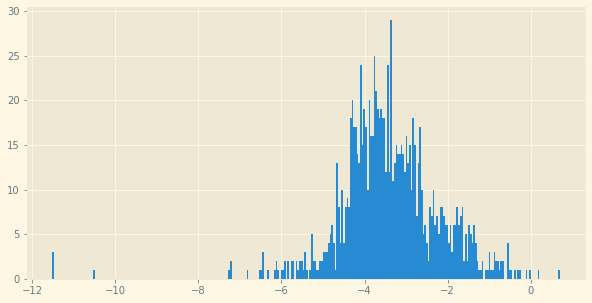

In [30]:
np.log(1e-5+ y).hist(bins=300)

In [36]:
features_ = feature_selection.get_best_features(100)

In [37]:
y, data = np.log(1e-5+ df["target"]), df.loc[:, df.columns != "target"]
data.drop("state", axis=1, inplace=True)
data = data.loc[:, features_]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                   y, 
                                                   train_size=0.8, 
                                                   shuffle=False, 
                                                   random_state=1234)

feature_selection_2 = fs.FeatureSelection("regression")
feature_selection_2.fit(x_train, y_train, n_jobs=-1, n_fold =5)

Error in the Score specification: regression hinge
 === Model Random_forest - TRAINING MODE === 
TRAIN, TEST: SAMPLE 1 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.5min finished


TRAIN, TEST: SAMPLE 2 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.4min finished


TRAIN, TEST: SAMPLE 3 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.3min finished


TRAIN, TEST: SAMPLE 4 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1107s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (16.6786s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   41.4s
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.2min finished


TRAIN, TEST: SAMPLE 5 out of 5 - Random_forest / hinge
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0678s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4460s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.8min finished


TRAINING : DONE - Random_forest
mean score out of sample: 0.7787643629511963


In [39]:
feature_selection_2.feature_importance

,Variable,Importance
5,cases_nom_pct5,100.000000
4,cases_pct5,85.190028
2,cases_nom_pct2,12.856548
9,cases_nom_pct1,12.459709
11,cases_pct1,11.088772
3,cases_pct2,10.172911
49,cases_pct2_lag1,3.719876
6,cases_nom_pct5_lag1,2.437040
1,deaths_nom,1.741159
78,cases_nom_pct1_lag2,1.677518


In [ ]:
y.hist(bins=1000)